# Trabalho 3

In [1]:
from auxx import *
from graph import *
import random as rd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
G = graph.from_a_file("graph_type1_2")

# Algoritmo de Karger

In [3]:
def karger_alg(G : graph):
    vert = list(range(G.vec_num))
    edges = G.edges_list
    # vertex_dict = {}
    while(len(vert) != 2):
        
        choice = rd.choice(edges)

        new_vert = max(vert)+1 #cria novo vertice
        vert.append(new_vert) #adiciona ao vertices

        # remove os vertices concatenados
        vert.remove(choice[0]) 
        vert.remove(choice[1])
        
        new_edges = [] #Criando uma lista de novas arestas
        # vertex_dict[new_vert] = (choice) #criando um dicionario com a representação dos vertices


        for e in edges: #percorrendo cada vertice antigo
            if sorted(e) == sorted(choice): #não adiciona as arestas concatenadas
                continue

            #muda o valor dos antigos vertices para o novo vertice
            elif choice[0] == e[0] or choice[1] == e[0]:
                new_edges.append((new_vert,e[1]))

            elif choice[0] == e[1] or choice [1] == e[1]:
                new_edges.append((e[0], new_vert))

            #mantem as arrestas de outros vertices
            else:
                new_edges.append(e)
        edges = new_edges
    
    
    return len(edges)
            


In [4]:
def karger(G : graph, vol : int):
    results_list = []

    for i in range(vol):
        results_list.append(karger_alg(G))
    
    return min(results_list) #retorno minimo

## Algoritmo Ingenuo

In [5]:
def naive_alg (G : graph):
    vertices = []
    blue_list = []
    red_list = []
    min_cut = 0

    for i in range (G.vec_num): #gerando a lista dos vértices
        vertices.append(i)

    while (len(vertices) > 0):
        choice = rd.choice(vertices)

        if (len(blue_list) <= len(red_list)):
            blue_list.append(choice)

            for k in red_list:
                if G.are_neigh(choice + 1, k + 1):
                    min_cut = min_cut + 1
        
        else:
            red_list.append(choice)

            for k in blue_list:
                if G.are_neigh(choice + 1, k + 1):
                    min_cut = min_cut + 1
        
        vertices.remove(choice)
    
    return min_cut

In [6]:
def naive (G : graph, iter_ : int):
    results_list = []

    for i in range (iter_):
        results_list.append(naive_alg(G))

    return min(results_list) #MInimo

## PROBABILIDADES

### Probabilidade de não aparição do melhor

$$P = (1 - \frac {2}{n^2 - n} )^N$$

n = numero de vertices <br>
N = numero de execuções

### Probabilidade de aparições por execuções dos algoritmos
A = Aparição do menor corte <br>
B = Aparição do não menor corte

$$ P(A.B) = \frac {P(A)} {P(A)+P(B)} $$

In [85]:
def descompact(tuple_):
    vert, vertex_dict = tuple_
    blue_list = []
    red_list = []

    blue_list.append(vert[0])
    red_list.append(vert[1])

    print(blue_list)

    aux = []

    while(len(vertex_dict.keys())):
        print(len(vertex_dict.keys()))
        print(vertex_dict.keys())

        for v in blue_list:
            if v not in vertex_dict.keys():
                print(v, "eita blue")
                break

            blue_list.append(vertex_dict[v][0])
            blue_list.append(vertex_dict[v][1])
            blue_list.remove(v)
            del vertex_dict[v]
            print(vertex_dict[v])
        

        for v in red_list:
            if v not in vertex_dict.keys():
                print(v, "eita red")
                print(vertex_dict[v])
                break

            red_list.append(vertex_dict[v][0])
            red_list.append(vertex_dict[v][1])
            red_list.remove(v)
            del vertex_dict[v]
        
    
    return red_list, blue_list

In [7]:
def prob_karger(G: graph, inter_ : int, vol: int, min_ : int):
    min_counter = 0
    
    for i in range(inter_):
        k = karger(G, vol)

        if k == min_:
            min_counter += 1
    
    return (min_counter/inter_)


In [66]:
def prob_karger_function (G: graph, inter_ : int, vol: int, min_ : int, step : int):
    x_o = []
    y_o = []
    x = inter_
    y = 0

    while (y < 0.98):
        y = prob_karger(G, x, vol, min_)
        print(x, y)
        x_o.append(x)
        y_o.append(y)
        x += step

        if x >= 10000:
            break
    
    return x_o, y_o


In [72]:
x, y = prob_karger_function(G = G, inter_ = 100, vol = 10, min_ = 2, step = 50)
print(x, y)

100 1.0
[100] [1.0]


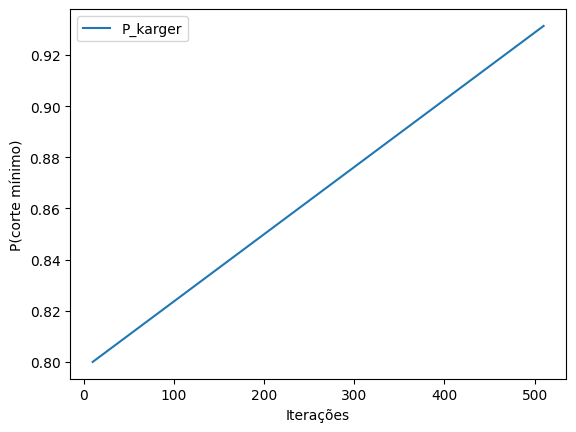

In [53]:
plt.plot()
plt.plot(x, y, label = "P_karger")
plt.xlabel("Iterações")
plt.ylabel("P(corte mínimo)")
plt.legend()
plt.show()